In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
import math
from sklearn.metrics import mean_squared_error

In [2]:
# Some functions to help out with
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real XRP Stock Price')
    plt.plot(predicted, color='blue',label='Predicted XRP Stock Price')
    plt.title('XRP Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('XRP Stock Price')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))
# First, we get the data
dataset = pd.read_csv('mastercard_stock_data.csv', parse_dates=['Date'])
dataset.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2006-05-25 00:00:00-04:00,3.698698,4.226428,3.689520,4.221839,395343000,0.0,0.0
1,2006-05-26 00:00:00-04:00,4.249371,4.289754,4.048375,4.123634,103044000,0.0,0.0
2,2006-05-30 00:00:00-04:00,4.127306,4.128224,3.932734,4.038280,49898000,0.0,0.0
3,2006-05-31 00:00:00-04:00,4.070401,4.163097,4.070401,4.124550,30002000,0.0,0.0
4,2006-06-01 00:00:00-04:00,4.123633,4.414573,4.120880,4.360423,62344000,0.0,0.0


In [5]:
#dataset=dataset.drop(columns=['Marketcap'],axis=1)

In [3]:
dataset

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2006-05-25 00:00:00-04:00,3.698698,4.226428,3.689520,4.221839,395343000,0.0,0.0
1,2006-05-26 00:00:00-04:00,4.249371,4.289754,4.048375,4.123634,103044000,0.0,0.0
2,2006-05-30 00:00:00-04:00,4.127306,4.128224,3.932734,4.038280,49898000,0.0,0.0
3,2006-05-31 00:00:00-04:00,4.070401,4.163097,4.070401,4.124550,30002000,0.0,0.0
4,2006-06-01 00:00:00-04:00,4.123633,4.414573,4.120880,4.360423,62344000,0.0,0.0
...,...,...,...,...,...,...,...,...
4425,2023-12-22 00:00:00-05:00,424.081619,426.497824,422.294427,423.432648,1759000,0.0,0.0
4426,2023-12-26 00:00:00-05:00,424.331220,425.050088,422.284458,423.003326,1258200,0.0,0.0
4427,2023-12-27 00:00:00-05:00,422.334354,424.341201,422.294409,423.692200,1324100,0.0,0.0
4428,2023-12-28 00:00:00-05:00,423.103134,427.685907,423.013279,425.649139,1505000,0.0,0.0


In [4]:
df=dataset

In [8]:
import math
import seaborn as sns
import datetime as dt
from datetime import datetime    
sns.set_style("whitegrid")
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

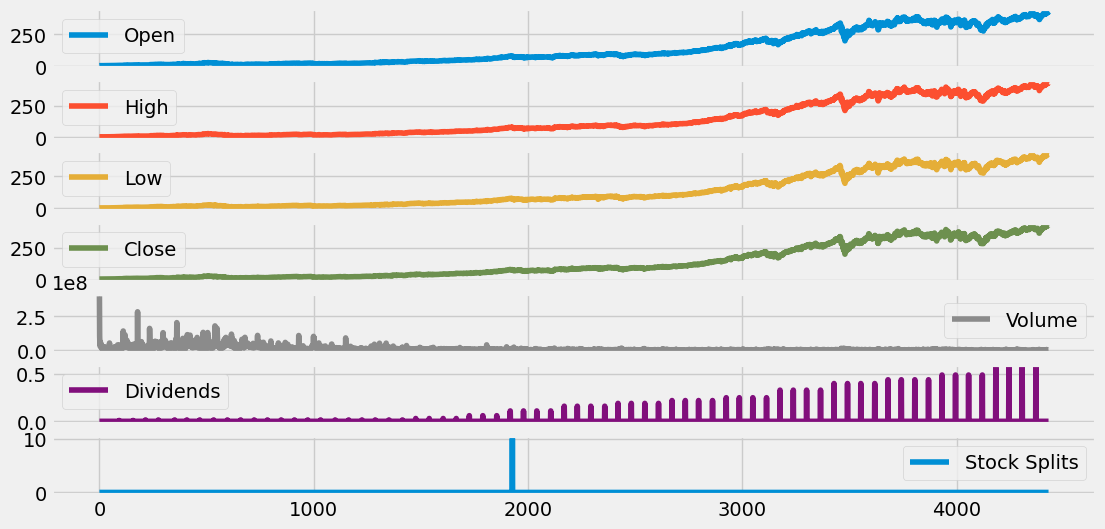

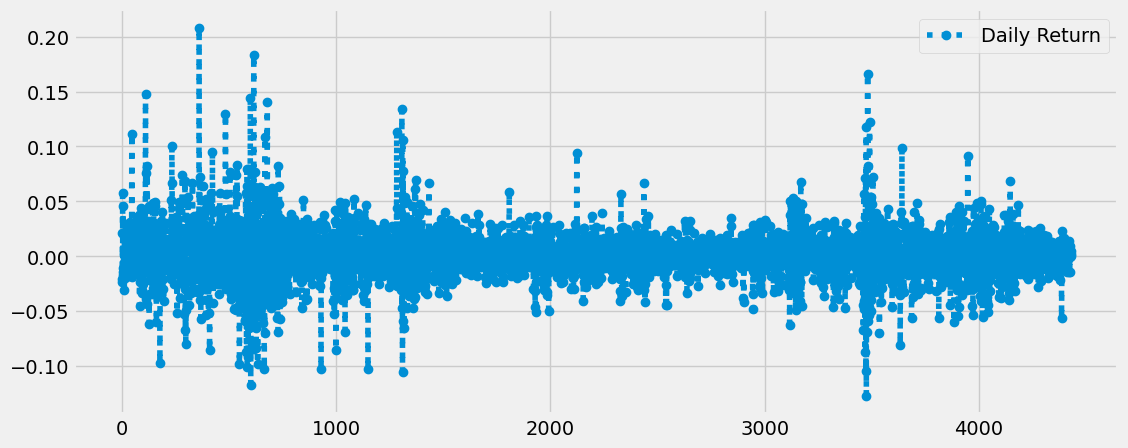

NameError: name 'sns' is not defined

In [5]:
data=df
data.plot(legend=True,subplots=True, figsize = (12, 6))
plt.show()
#data['Close'].plot(legend=True, figsize = (12, 6))
#plt.show()
#data['Volume'].plot(legend=True,figsize=(12,7))
#plt.show()

data.shape
data.size
data.describe(include='all').T
data.dtypes
data.nunique()
ma_day = [10,50,100]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    data[column_name]=pd.DataFrame.rolling(data['Close'],ma).mean()

data['Daily Return'] = data['Close'].pct_change()
# plot the daily return percentage
data['Daily Return'].plot(figsize=(12,5),legend=True,linestyle=':',marker='o')
plt.show()

sns.displot(data['Daily Return'].dropna(),bins=100,color='green')
plt.show()

date=pd.DataFrame(data['Date'])
closing_df1 = pd.DataFrame(data['Close'])
close1  = closing_df1.rename(columns={"Close": "data_close"})
close2=pd.concat([date,close1],axis=1)
close2.head()

data.reset_index(drop=True, inplace=True)
data.fillna(data.mean(), inplace=True)
data.head()

data.nunique()

data.sort_index(axis=1,ascending=True)

cols_plot = ['Open', 'High', 'Low','Close','Volume','MA for 10 days','MA for 50 days','MA for 100 days','Daily Return']
axes = data[cols_plot].plot(marker='.', alpha=0.7, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

data.isnull().sum()

In [6]:
data.shape

(4430, 12)

In [7]:
data.keys()

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits', 'MA for 10 days', 'MA for 50 days', 'MA for 100 days',
       'Daily Return'],
      dtype='object')

In [9]:
data.reset_index(drop=True, inplace=True)
data.fillna(data.mean(), inplace=True)
data.head()

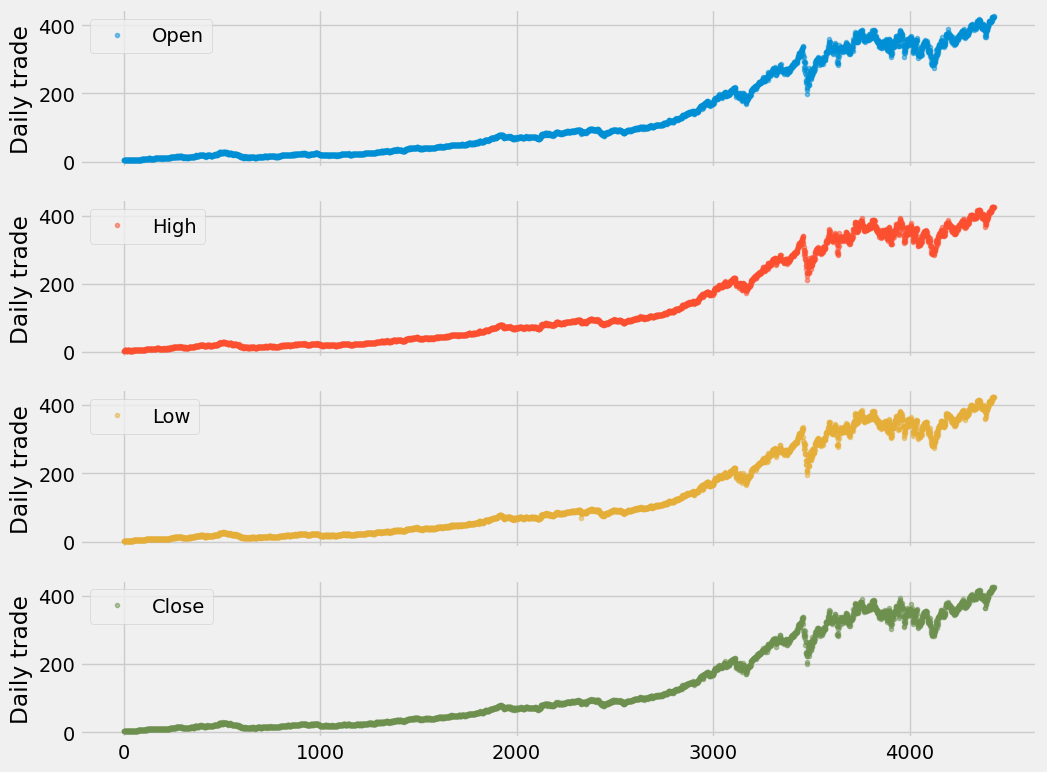

In [10]:
cols_plot = ['Open', 'High', 'Low','Close']
axes = data[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

                           Date        Open        High         Low  \
0     2006-05-25 00:00:00-04:00    3.698698    4.226428    3.689520   
1     2006-05-26 00:00:00-04:00    4.249371    4.289754    4.048375   
2     2006-05-30 00:00:00-04:00    4.127306    4.128224    3.932734   
3     2006-05-31 00:00:00-04:00    4.070401    4.163097    4.070401   
4     2006-06-01 00:00:00-04:00    4.123633    4.414573    4.120880   
...                         ...         ...         ...         ...   
4425  2023-12-22 00:00:00-05:00  424.081619  426.497824  422.294427   
4426  2023-12-26 00:00:00-05:00  424.331220  425.050088  422.284458   
4427  2023-12-27 00:00:00-05:00  422.334354  424.341201  422.294409   
4428  2023-12-28 00:00:00-05:00  423.103134  427.685907  423.013279   
4429  2023-12-29 00:00:00-05:00  426.008552  427.675938  423.602341   

           Close     Volume  Dividends  Stock Splits  MA for 10 days  \
0       4.221839  395343000        0.0           0.0             NaN   
1  

,count,mean,std,min,25%,50%,75%,max
Open,4430.0,1.355990e+02,1.299211e+02,3.698698,2.355051e+01,8.280703e+01,2.572975e+02,4.260086e+02
High,4430.0,1.370107e+02,1.312688e+02,4.047456,2.381519e+01,8.341630e+01,2.611286e+02,4.276859e+02
Low,4430.0,1.341628e+02,1.285526e+02,3.689520,2.327126e+01,8.193235e+01,2.538116e+02,4.236023e+02
Close,4430.0,1.356280e+02,1.299437e+02,4.029100,2.352705e+01,8.276866e+01,2.579397e+02,4.258388e+02
Volume,4430.0,1.117639e+07,1.673454e+07,641100.000000,3.226900e+06,5.067900e+06,1.144775e+07,3.953430e+08
Dividends,4430.0,2.992777e-03,3.301711e-02,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,5.700000e-01
Stock Splits,4430.0,2.257336e-03,1.502443e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01
MA for 10 days,4421.0,1.354683e+02,1.296175e+02,4.123634,2.349071e+01,8.277172e+01,2.557497e+02,4.229654e+02
MA for 50 days,4381.0,1.348179e+02,1.283933e+02,4.256401,2.315137e+01,8.336960e+01,2.585304e+02,4.023113e+02
MA for 100 days,4331.0,1.340540e+02,1.270453e+02,4.962001,2.306026e+01,8.345384e+01,2.585654e+02,4.020071e+02


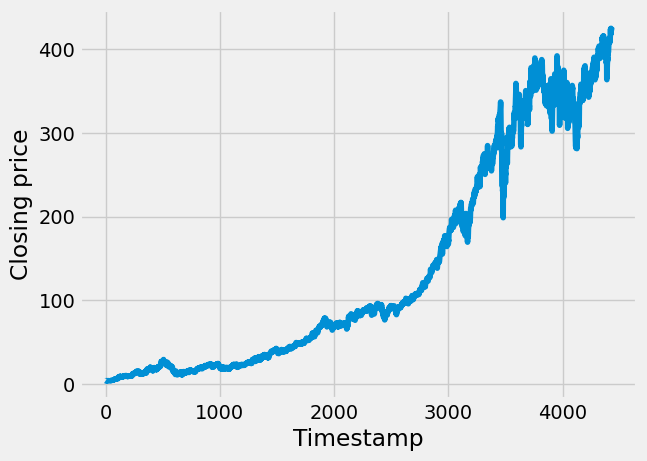

In [11]:
plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

df.describe().transpose()

In [16]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,MA for 10 days,MA for 50 days,MA for 100 days,Daily Return
0,2006-05-25 00:00:00-04:00,3.698698,4.226428,3.689520,4.221839,395343000,0.0,0.0,NaN,NaN,NaN,NaN
1,2006-05-26 00:00:00-04:00,4.249371,4.289754,4.048375,4.123634,103044000,0.0,0.0,NaN,NaN,NaN,-0.023261
2,2006-05-30 00:00:00-04:00,4.127306,4.128224,3.932734,4.038280,49898000,0.0,0.0,NaN,NaN,NaN,-0.020699
3,2006-05-31 00:00:00-04:00,4.070401,4.163097,4.070401,4.124550,30002000,0.0,0.0,NaN,NaN,NaN,0.021363
4,2006-06-01 00:00:00-04:00,4.123633,4.414573,4.120880,4.360423,62344000,0.0,0.0,NaN,NaN,NaN,0.057188
...,...,...,...,...,...,...,...,...,...,...,...,...
4425,2023-12-22 00:00:00-05:00,424.081619,426.497824,422.294427,423.432648,1759000,0.0,0.0,420.852695,400.180875,400.721920,0.001559
4426,2023-12-26 00:00:00-05:00,424.331220,425.050088,422.284458,423.003326,1258200,0.0,0.0,421.647446,400.692868,401.033717,-0.001014
4427,2023-12-27 00:00:00-05:00,422.334354,424.341201,422.294409,423.692200,1324100,0.0,0.0,422.007877,401.156138,401.368954,0.001629
4428,2023-12-28 00:00:00-05:00,423.103134,427.685907,423.013279,425.649139,1505000,0.0,0.0,422.171619,401.646365,401.668726,0.004619


In [12]:
from sklearn.model_selection import train_test_split

X = []
Y = []
window_size=100
for i in range(1 , len(df) - window_size -1 , 1):
    first = df.iloc[i,2]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df.iloc[i + j, 2] - first) / first)
    temp2.append((df.iloc[i + window_size, 2] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

3462
866


In [13]:
train_X.shape

(3462, 1, 100, 1)

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Dense,RepeatVector, LSTM, Dropout
from tensorflow.keras.layers import Flatten, Conv1D, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model

In [1]:
# For creating model and training
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.metrics import RootMeanSquaredError

model = tf.keras.Sequential()

# Creating the Neural Network model here...
# CNN layers
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu', input_shape=(None, 100, 1))))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(128, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Flatten()))
# model.add(Dense(5, kernel_regularizer=L2(0.01)))

# LSTM layers
model.add(Bidirectional(LSTM(100, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(100, return_sequences=False)))
model.add(Dropout(0.2))

#Final layers
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

history = model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=100,batch_size=50, verbose=1, shuffle =True)

In [20]:
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, GRU, Dense, Dropout, TimeDistributed, MaxPooling1D, Flatten, Concatenate
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsoluteError

model = tf.keras.Sequential()

# Creating the Neural Network model here...
# CNN layers
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu', input_shape=(None, 100, 1))))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(128, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Flatten()))

# GRU layers
model.add(GRU(100, return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(100))
model.add(Dropout(0.2))

# Combine CNN and GRU outputs
model.add(Flatten())  # Flatten the GRU output
model.add(Dense(128, activation='relu'))  # Additional layer for better feature representation
model.add(Dense(64, activation='relu'))   # Additional layer for better feature representation
model.add(Dense(1, activation='linear'))  # Output layer

model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae', RootMeanSquaredError(), MeanAbsoluteError()])

history = model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=100, batch_size=50, verbose=1, shuffle=True)


Epoch 1/100


c:\Users\amarn\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


70/70 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - loss: 0.0220 - mae: 0.1003 - mean_absolute_error: 0.1003 - mse: 0.0220 - root_mean_squared_error: 0.1459 - val_loss: 0.0090 - val_mae: 0.0635 - val_mean_absolute_error: 0.0635 - val_mse: 0.0086 - val_root_mean_squared_error: 0.0927
Epoch 2/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0071 - mae: 0.0570 - mean_absolute_error: 0.0570 - mse: 0.0071 - root_mean_squared_error: 0.0841 - val_loss: 0.0048 - val_mae: 0.0496 - val_mean_absolute_error: 0.0496 - val_mse: 0.0048 - val_root_mean_squared_error: 0.0692
Epoch 3/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0051 - mae: 0.0498 - mean_absolute_error: 0.0498 - mse: 0.0050 - root_mean_squared_error: 0.0710 - val_loss: 0.0045 - val_mae: 0.0492 - val_mean_absolute_error: 0.0492 - val_mse: 0.0045 - val_root_mean_squared_error: 0.0674
Epoch 4/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0050 - mae: 0.0497 - mean_absolute_error: 0.0497 - mse: 0.0050 - root_mean_squared_error: 0.

In [16]:
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, GRU, LSTM, Dense, Dropout, TimeDistributed, MaxPooling1D, Flatten, Concatenate
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsoluteError

model = tf.keras.Sequential()

# Creating the Neural Network model here...
# CNN layers
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu', input_shape=(None, 100, 1))))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(128, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Flatten()))

# GRU layers
model.add(GRU(100, return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(100, return_sequences=True))
model.add(Dropout(0.2))

# LSTM layers
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100))

# Additional Dense layers
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

# Output layer
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae', RootMeanSquaredError(), MeanAbsoluteError()])

history = model.fit(train_X, train_Y, validation_data=(test_X, test_Y), epochs=100, batch_size=50, verbose=1, shuffle=True)


c:\Users\amarn\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - loss: 0.0358 - mae: 0.1240 - mean_absolute_error: 0.1240 - mse: 0.0358 - root_mean_squared_error: 0.1869 - val_loss: 0.0054 - val_mae: 0.0517 - val_mean_absolute_error: 0.0517 - val_mse: 0.0055 - val_root_mean_squared_error: 0.0742
Epoch 2/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0074 - mae: 0.0602 - mean_absolute_error: 0.0602 - mse: 0.0074 - root_mean_squared_error: 0.0860 - val_loss: 0.0042 - val_mae: 0.0455 - val_mean_absolute_error: 0.0455 - val_mse: 0.0043 - val_root_mean_squared_error: 0.0655
Epoch 3/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0054 - mae: 0.0523 - mean_absolute_error: 0.0523 - mse: 0.0054 - root_mean_squared_error: 0.0736 - val_loss: 0.0051 - val_mae: 0.0534 - val_mean_absolute_error: 0.0534 - val_mse: 0.0052 - val_root_mean_squared_error: 0.0720
Epoch 4/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0051 - mae: 0.0508 - mean_absolute_error: 0.0508 - mse: 0.0051 - root_mean_squar

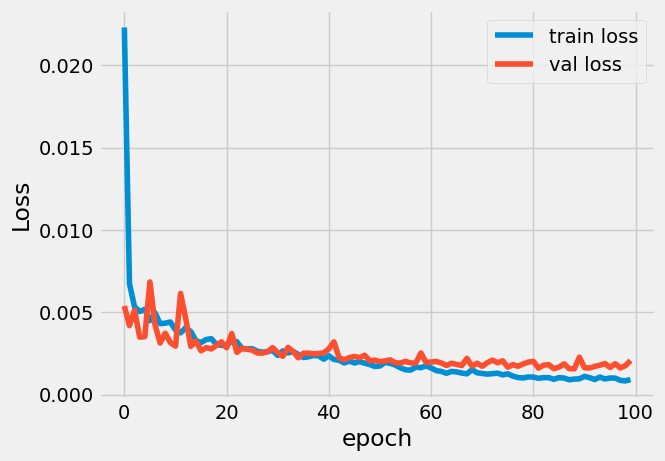

In [17]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

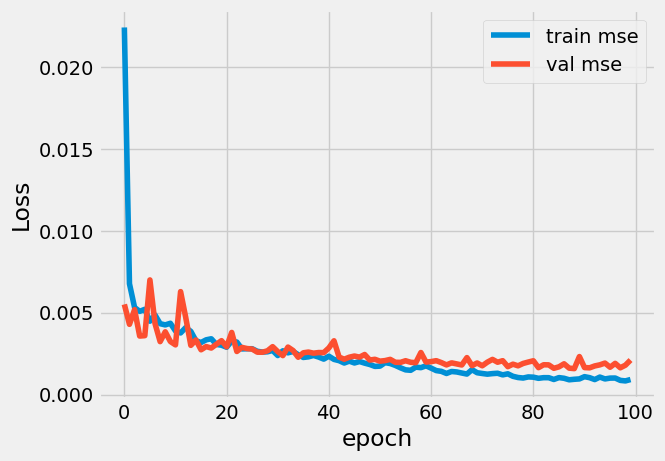

In [18]:
plt.plot(history.history['mse'], label='train mse')
plt.plot(history.history['val_mse'], label='val mse')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

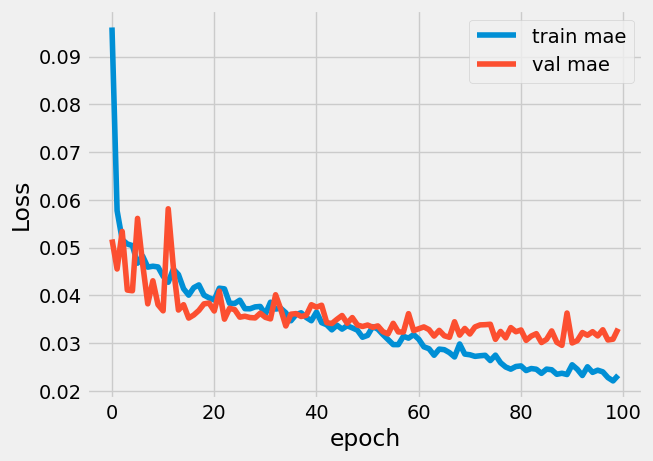

In [19]:
plt.plot(history.history['mae'], label='train mae')
plt.plot(history.history['val_mae'], label='val mae')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

In [20]:
# After the model has been constructed, we'll summarise it
from tensorflow.keras.utils import plot_model
print(model.summary())
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ time_distributed                │ (None, 1, 98, 64)      │           256 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_1              │ (None, 1, 49, 64)      │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_2              │ (None, 1, 47, 128)     │        24,704 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_3              │ (None, 1, 23, 128)     │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_4              │ (None, 1, 21, 64)      │        24,640 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_5              │ (None, 1, 10, 64)      │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_6              │ (None, 1, 640)         │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 1, 100)         │       222,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 100)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 1, 100)         │        60,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1, 100)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 1, 100)         │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1, 100)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        12,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,544,549 (5.89 MB)

 Trainable params: 514,849 (1.96 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,029,700 (3.93 MB)

None
You must install pydot (`pip install pydot`) for `plot_model` to work.


In [21]:
model.evaluate(test_X, test_Y)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0020 - mae: 0.0330 - mean_absolute_error: 0.0330 - mse: 0.0020 - root_mean_squared_error: 0.0450


[0.0021239512134343386,
 0.03301398828625679,
 0.03301398828625679,
 0.0021149534732103348,
 0.045988623052835464]

In [22]:
from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

# predict probabilities for test set
yhat_probs = model.predict(test_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

var = explained_variance_score(test_Y.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(test_Y.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % var)

var2 = max_error(test_Y.reshape(-1,1), yhat_probs)
print('Max Error: %f' % var2)

Variance: 0.950026
R2 Score: 0.950026
Max Error: 0.284722


In [23]:
data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,MA for 10 days,MA for 50 days,MA for 100 days,Daily Return
0,2006-05-25 00:00:00-04:00,3.698698,4.226428,3.689520,4.221839,395343000,0.0,0.0,NaN,NaN,NaN,NaN
1,2006-05-26 00:00:00-04:00,4.249371,4.289754,4.048375,4.123634,103044000,0.0,0.0,NaN,NaN,NaN,-0.023261
2,2006-05-30 00:00:00-04:00,4.127306,4.128224,3.932734,4.038280,49898000,0.0,0.0,NaN,NaN,NaN,-0.020699
3,2006-05-31 00:00:00-04:00,4.070401,4.163097,4.070401,4.124550,30002000,0.0,0.0,NaN,NaN,NaN,0.021363
4,2006-06-01 00:00:00-04:00,4.123633,4.414573,4.120880,4.360423,62344000,0.0,0.0,NaN,NaN,NaN,0.057188
...,...,...,...,...,...,...,...,...,...,...,...,...
4425,2023-12-22 00:00:00-05:00,424.081619,426.497824,422.294427,423.432648,1759000,0.0,0.0,420.852695,400.180875,400.721920,0.001559
4426,2023-12-26 00:00:00-05:00,424.331220,425.050088,422.284458,423.003326,1258200,0.0,0.0,421.647446,400.692868,401.033717,-0.001014
4427,2023-12-27 00:00:00-05:00,422.334354,424.341201,422.294409,423.692200,1324100,0.0,0.0,422.007877,401.156138,401.368954,0.001629
4428,2023-12-28 00:00:00-05:00,423.103134,427.685907,423.013279,425.649139,1505000,0.0,0.0,422.171619,401.646365,401.668726,0.004619


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


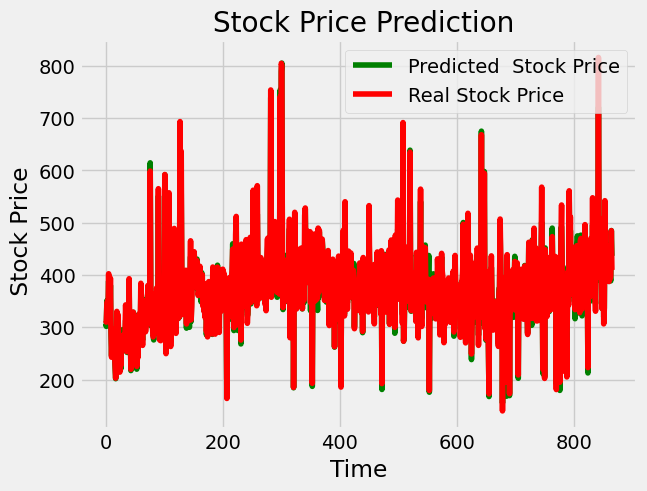

In [24]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

In [2]:
#!pip install -U numpy

In [1]:
import math
import random 
import statistics
import pandas as pd
import numpy as np
from pandas import read_csv
from pandas import set_option
from numpy import mean
from numpy import std
from numpy import arange
from pandas import read_csv
from sklearn.feature_selection import VarianceThreshold
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers.core import Dense, Activation, Dropout
import tensorflow as tf
from keras.callbacks import Callback
from keras import backend
from keras.layers import Dense, BatchNormalization, Dropout
from  tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from math import floor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from numpy import sqrt
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import PowerTransformer
from numpy.random import seed
import talib
from talib.abstract import *
import warnings
warnings.filterwarnings('ignore')
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import LSTM, GRU
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.layers import Conv1D, MaxPooling1D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Bidirectional

In [2]:
#!pip install ta-lib
#!pip install --upgrade pip
#!pip install -U numpy


In [3]:
#!pip install numpy --upgrade --ignore-installed

In [4]:

#The real Notebook start from here...
Gold = pd.read_csv(r'bitcoin_dataset.csv',header=0, index_col=0, parse_dates=True,squeeze=True)
Gold = Gold[Gold.Open !=0]
Gold = Gold[Gold.High !=0]
Gold = Gold[Gold.Low !=0]
Gold = Gold[Gold.Close !=0]
Gold

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2022-02-15,42586.464844,44667.218750,42491.035156,44575.203125,44575.203125,22721659051
2022-02-16,44578.277344,44578.277344,43456.691406,43961.859375,43961.859375,19792547657
2022-02-17,43937.070313,44132.972656,40249.371094,40538.011719,40538.011719,26246662813


In [5]:
# add lags we set in "lag_list" and place them in order to the dataset.

def Add_Lag(data,col,lag_list):
    
    position = data.columns.tolist().index(col)
    
    for lag in lag_list:
    
        col_val = data[col].shift(lag)

        col_name = col+'_lag:'+'{length}'.format(length=lag)

        data.insert(loc=position, column=col_name, value=col_val)
        

    return data

def Indicator(Data):

    data = pd.DataFrame()
    data['Open'] = Data['Open']
    data['High'] = Data['High']
    data['Low'] = Data['Low']
    data['Close'] = Data['Close']
    data['Volume'] = Data['Volume']


    Orginal_columns_names = ['Open', 'High', 'Low', 'Close', 'Volume']
    
    #we apply indicators on one lage data
    Open = data['Open'].shift(1)
    High = data['High'].shift(1)
    Low = data['Low'].shift(1)
    Close = data['Close'].shift(1)
    Volume = data['Volume'].shift(1)

    Orginal_columns_values = {'open':Open,'high':High,'low':Low,'close':Close,'volume':Volume}

    #Gathering all functions in the Talib library
    Talib = talib.get_function_groups()
    Groups = list(Talib.keys())
    Indicators = []
    for group in Groups:
        for g in Talib[group]:
            Indicators.append(g)
    #As the following two functions are not returning an array with length of our data.shapep[0], we remove it
    Indicators.remove('MAVP')
    Indicators.remove('OBV')

    for indicator in Indicators:
        indicator = eval(indicator)
        
        #Here we have two types of functions(indicators,...):
        #The ones need just one column and the others which need more

        if len(indicator.output_names)==1:

            if list(indicator.get_input_names().values()) == ['close']:

                for col in Orginal_columns_names:

                    lagged_col = data[col].shift(1)

                    new_col = indicator(lagged_col)

                    name = indicator.info['name']

                    col_name = col+'_'+'{Name}'.format(Name=name)

                    data[col_name] = new_col

            else: #Functions need more than one features, e.g. [High, Low, Close, Open]

                name = indicator.info['name']

                inputs = list(indicator.get_input_names().values())

                if len(inputs)==2:

                    new_col = indicator(Orginal_columns_values[inputs[0]],Orginal_columns_values[inputs[1]])

                    data[name] = new_col
                    
                elif len(inputs)==3:

                    new_col = indicator(Orginal_columns_values[inputs[0]],Orginal_columns_values[inputs[1]],Orginal_columns_values[inputs[2]])
                    
                    data[name] = new_col
                    
                elif len(inputs)==4:
                    
                    new_col = indicator(Orginal_columns_values[inputs[0]],Orginal_columns_values[inputs[1]],Orginal_columns_values[inputs[2]],Orginal_columns_values[inputs[3]])
                    
                    data[name] = new_col
    
    remove_col = []
    for col in data.columns:
        if float('-inf') in data[col].values: #Remove columns that have very large values
            remove_col.append(col)
        if data.tail(data.shape[0]-100)[col].isnull().values.any()==True: #remove columns that have nan values which are not cause of lags
            remove_col.append(col)
            
    remove_col = remove_col+Orginal_columns_names
    data.drop(remove_col,axis=1,inplace=True)

    return data


def add_diff(data,col): #A simple type of features which calculate just the difference between sequential values in each columns

    position = data.columns.tolist().index(col)

    diff = [0,0]

    for i in range(1,data.shape[0]-1):

        difference = data[col][i] -  data[col][i-1]

        diff.append(difference)
    
    col_name = col+'_difference'

    data.insert(loc=position, column=col_name, value=diff)

    return data

def Roll_Stats(data,col,Roll_Window): #Calculating simple statistics of the data
    
    lag = 1
    
    def difference(l1,l2):
        diff = []
        for i in range(len(l1)):
            diff.append(l1[i]-l2[i])
        
        return diff

  
    position = data.columns.tolist().index(col)
    
    for window in Roll_Window:
        
        Window = window
        col_val = data[col].shift(lag)
        window = col_val.rolling(window=window)
        means = window.mean()
        std = window.var()
        Max  = window.max()
        Min = window.min()
        diff = difference(Max,Min)
    
        col_name_mean = col+'_mean'+'_lag:'+'{length}'.format(length=lag)+\
        '_win:'+'{length}'.format(length=Window)
        col_name_std = col+'_std'+'_lag:'+'{length}'.format(length=lag)+\
        '_win:'+'{length}'.format(length=Window)
        col_name_max = col+'_max'+'_lag:'+'{length}'.format(length=lag)+\
        '_win:'+'{length}'.format(length=Window)
        col_name_min = col+'_min'+'_lag:'+'{length}'.format(length=lag)+\
        '_win:'+'{length}'.format(length=Window)
        col_name_diff = col+'_diff'+'_lag:'+'{length}'.format(length=lag)+\
        '_win:'+'{length}'.format(length=Window)

        data.insert(loc=position, column=col_name_mean, value=means)
        data.insert(loc=position, column=col_name_std, value=std)
        data.insert(loc=position, column=col_name_max, value=Max)
        data.insert(loc=position, column=col_name_min, value=Min)
        data.insert(loc=position, column=col_name_diff, value=diff)
        

    return data

# this is the final function that use above functions and return the prepared dataset
def Prepare_Data(data,col,Lag_list,Roll_window):
    
    if min(Roll_window) <2:
        print('Roll_window must be greater than 1.')

    Add_Lag(data,col,Lag_list)
    Roll_Stats(data,col,Roll_window)
    add_diff(data,col)

    return data

def Combine(Data,col,Lag_list,Roll_window):

    data = pd.DataFrame({col:Data[col]}, index = Data.index)
    
    #prepare the target column we wish to predict
    data = Prepare_Data(data,col,Lag_list,Roll_window)
    
    #these three columns with their new features add to the final dataset, whatever the target column is. 
    Open = Prepare_Data(pd.DataFrame(Data['Open']),'Open',Lag_list,Roll_window)
    Close = Prepare_Data(pd.DataFrame(Data['Close']),'Close',Lag_list,Roll_window)
    Volume = Prepare_Data(pd.DataFrame(Data['Volume']),'Volume',Lag_list,Roll_window)
    Low = Prepare_Data(pd.DataFrame(Data['Low']),'Low',Lag_list,Roll_window)
    High = Prepare_Data(pd.DataFrame(Data['High']),'High',Lag_list,Roll_window)
        
    #now we merge all the dataset we created above together to have a complete dataset 
    data = pd.concat([Open,Close,Volume,High,Low],axis=1)
    
    if col == 'High':
        data=data.drop(['Low','Open','Close','Volume'],axis=1)
    
    elif col == 'Low':
        data=data.drop(['High','Open','Close','Volume'],axis=1)
    
    elif col == 'Open':
        data=data.drop(['High','Low','Close','Volume'],axis=1)
    
    elif col == 'Volume':
        data=data.drop(['High','Open','Close','Low'],axis=1)
        
    """
    ***Important***
    
    As we aim to make forcasting the close price, we have [Open, Low, High, Value] values for that day.
    
    But with this function we can make prediction on any other features.
    """
    
    target = data[col]
    data.drop([col],axis=1,inplace=True)

    data.insert(loc=data.shape[1], column=col, value=target)
    return data

def mutual_information_lag(Data,target_col,k_best):
    
    mic_ordered = {}
    seed(21)
    
    #calculating the mutual information score between lag columns and target column; one of {Open,Close,High,Low,Volume} which selected above
    for col in Data.columns[1:-1]:
        col_val = Data[col].values
        #Due to existing some large values in some columns which are hard to handle for calculating their mutual information with the target
        #we set a bound for maximum value in columns
        if max(col_val) < 1000000: 
            score = mutual_info_regression(col_val.reshape(-1, 1), Data[target_col].values)
            mic_ordered[col] = score[0]
    
    #descend sort the lag list by their mutual information score
    sorted_mic = {k: v for k, v in sorted(mic_ordered.items(),reverse=True, key=lambda item: item[1])}
    
    #select the k first lags that have most mutual information scor
    selected_col = list(sorted_mic.keys())[:k_best]

    return selected_col,sorted_mic

#=============== Final Function =============================

def Final_Data_Preparation(Data,col,Lag_list,Roll_window,mic):

    #Tomorrow = pd.DataFrame(index =[Tomorrow_date] ,columns=Gold.columns)

    #Data = pd.concat([Data,Tomorrow],axis=0)

    data = Combine(Data,col,Lag_list,Roll_window)
    df = Indicator(Data)
    data = pd.concat([df,data],axis=1)
    data = data.tail(data.shape[0]-100)
 
    MIC = mutual_information_lag(data.head(data.shape[0]-1),col,100)

    val = list(MIC[1].values())
    selected = [i for i in val if i > mic]
    bestCol = len(selected)
    Best_col = list(MIC[1].keys())
    Best_col = Best_col[:bestCol]
    Remove_col = list(set(data.columns[:-1]) - set(Best_col))
    data.drop(Remove_col,axis=1,inplace=True)

    return data

In [6]:
Close = Final_Data_Preparation(Gold,'Close',[i for i in range(1,30)],[i for i in range(2,60)],3)
Close

,ADD,Open_CEIL,High_CEIL,Low_CEIL,Close_CEIL,Open_FLOOR,High_FLOOR,Low_FLOOR,Close_FLOOR,Open_LN,...,Low_max_lag:1_win:4,Low_mean_lag:1_win:4,Low_min_lag:1_win:3,Low_max_lag:1_win:3,Low_mean_lag:1_win:3,Low_min_lag:1_win:2,Low_max_lag:1_win:2,Low_mean_lag:1_win:2,Low,Close
Date,,,,,,,,,,,,,,,,,,,,,
2014-12-26,639.628021,323.0,323.0,317.0,320.0,322.0,322.0,316.0,319.0,5.775439,...,329.601990,322.085495,316.958008,329.601990,322.638998,316.958008,321.356995,319.157501,316.627014,327.924011
2014-12-27,648.051025,320.0,332.0,317.0,328.0,319.0,331.0,316.0,327.0,5.765668,...,329.601990,321.136002,316.627014,321.356995,318.314006,316.627014,316.958008,316.792511,312.630005,315.863007
2014-12-28,641.541016,328.0,329.0,313.0,316.0,327.0,328.0,312.0,315.0,5.791741,...,321.356995,316.893005,312.630005,316.958008,315.405009,312.630005,316.627014,314.628509,311.078003,317.239014
2014-12-29,631.106018,317.0,321.0,312.0,318.0,316.0,320.0,311.0,317.0,5.756248,...,316.958008,314.323258,311.078003,316.627014,313.445007,311.078003,312.630005,311.854004,312.307007,312.670013
2014-12-30,632.574005,318.0,321.0,313.0,313.0,317.0,320.0,312.0,312.0,5.761111,...,316.627014,313.160507,311.078003,312.630005,312.005005,311.078003,312.307007,311.692505,309.372986,310.737000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-15,84457.734375,42158.0,42776.0,41682.0,42587.0,42157.0,42775.0,41681.0,42586.0,10.649165,...,42114.539063,41900.002930,41681.957031,41950.941406,41828.490885,41681.957031,41950.941406,41816.449219,42491.035156,44575.203125
2022-02-16,87158.253906,42587.0,44668.0,42492.0,44576.0,42586.0,44667.0,42491.0,44575.0,10.659292,...,42491.035156,41994.126953,41681.957031,42491.035156,42041.311198,41681.957031,42491.035156,42086.496094,43456.691406,43961.859375
2022-02-17,88034.968750,44579.0,44579.0,43457.0,43962.0,44578.0,44578.0,43456.0,43961.0,10.705002,...,43456.691406,42395.156250,41681.957031,43456.691406,42543.227864,42491.035156,43456.691406,42973.863281,40249.371094,40538.011719


In [7]:
Close.head()

,ADD,Open_CEIL,High_CEIL,Low_CEIL,Close_CEIL,Open_FLOOR,High_FLOOR,Low_FLOOR,Close_FLOOR,Open_LN,...,Low_max_lag:1_win:4,Low_mean_lag:1_win:4,Low_min_lag:1_win:3,Low_max_lag:1_win:3,Low_mean_lag:1_win:3,Low_min_lag:1_win:2,Low_max_lag:1_win:2,Low_mean_lag:1_win:2,Low,Close
Date,,,,,,,,,,,,,,,,,,,,,
2014-12-26,639.628021,323.0,323.0,317.0,320.0,322.0,322.0,316.0,319.0,5.775439,...,329.601990,322.085495,316.958008,329.601990,322.638998,316.958008,321.356995,319.157501,316.627014,327.924011
2014-12-27,648.051025,320.0,332.0,317.0,328.0,319.0,331.0,316.0,327.0,5.765668,...,329.601990,321.136002,316.627014,321.356995,318.314006,316.627014,316.958008,316.792511,312.630005,315.863007
2014-12-28,641.541016,328.0,329.0,313.0,316.0,327.0,328.0,312.0,315.0,5.791741,...,321.356995,316.893005,312.630005,316.958008,315.405009,312.630005,316.627014,314.628509,311.078003,317.239014
2014-12-29,631.106018,317.0,321.0,312.0,318.0,316.0,320.0,311.0,317.0,5.756248,...,316.958008,314.323258,311.078003,316.627014,313.445007,311.078003,312.630005,311.854004,312.307007,312.670013
2014-12-30,632.574005,318.0,321.0,313.0,313.0,317.0,320.0,312.0,312.0,5.761111,...,316.627014,313.160507,311.078003,312.630005,312.005005,311.078003,312.307007,311.692505,309.372986,310.737000


MAE: 874.627018
RMSE: 1300.424413


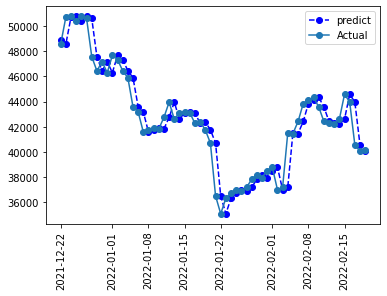

In [8]:
y_test = Close['Close'][-60:].values
baseline = Close['Close'].shift(1)[-60:].values


predict = baseline

x = Close[-60:].index

mae = mean_absolute_error(y_test, predict)
rmse = sqrt(mean_squared_error(y_test, predict))


"""The best case for both diff in the following is small positive numbers
which means the prediction is accurate and the trading strategy is possible.""" 


compare = pd.DataFrame(columns=['Actual','Predict'])
compare['Actual'] = y_test
compare['Predict'] = predict

print('MAE: %f' % mae)
print('RMSE: %f' % rmse)

# plot lines
plt.plot(x, predict,'--bo', label = "predict",linestyle = 'dashed')
plt.plot(x, y_test,marker='o', label = "Actual")
plt.xticks(rotation = 90)
plt.legend()
plt.show()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 50)             31000     
                                                                 
 lstm_1 (LSTM)               (None, 20)                5680      
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 36,701
Trainable params: 36,701
Non-trainable params: 0
_________________________________________________________________
MAE before inverse Scaling: 0.022522
RMSE before inverse Scaling: 0.025335
MAE after inverse scaling: 1334.475333
RMSE after inverse scaling: 1495.691951


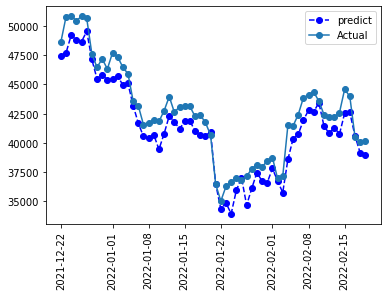

CPU times: user 4min 46s, sys: 15.4 s, total: 5min 1s
Wall time: 2min 12s


In [9]:
%%time
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

scaler = PowerTransformer()
data = Close.values
data = scaler.fit_transform(data)

y_scaler = PowerTransformer()
y_prime = Close.values[:,-1].reshape(-1, 1)
y_prime = y_scaler.fit_transform(y_prime)

# choose a number of time steps
n_steps = 5
# convert into input/output
X, y = split_sequences(data, n_steps)

X_train, X_test =X[:-60], X[-60:]
y_train, y_test =  y[:-60], y[-60:]
# the dataset knows the number of features, e.g. 2
n_features = X.shape[2]
# define model
model = Sequential()
model.add(LSTM(50, activation='sigmoid', return_sequences=True,input_shape=(n_steps, n_features)))
#model.add(RepeatVector(2))
#model.add(LSTM(50, activation='relu', return_sequences=True))
#model.add(LSTM(20, activation='relu', return_sequences=True))
model.add(LSTM(20, activation='sigmoid'))
#model.add(TimeDistributed(Dense(n_features)))
model.add(Dense(1))#,  activation='sigmoid'))
model.compile(optimizer='RMSprop', loss='mse',metrics=[tf.keras.metrics.RootMeanSquaredError()])
# fit model
model.fit(X_train, y_train, epochs=500,batch_size=32, verbose=0)
model.summary()
# demonstrate prediction
test = []
for i in range(60):

    test.append(X_test[i])

yhat = model.predict(array(test), verbose=0)
prediction = []
for i in range(60):

    prediction.append(yhat[i][0])

mae = mean_absolute_error(y_test, prediction)
rmse = sqrt(mean_squared_error(y_test, prediction))
print('MAE before inverse Scaling: %f' % mae)
print('RMSE before inverse Scaling: %f' % rmse)

y_test = y_scaler.inverse_transform(y_test.reshape(-1, 1))
y_test = [ '%.1f' % y for y in y_test ]
y_test = [float(i) for i in y_test]
predict = y_scaler.inverse_transform(array(prediction).reshape(-1, 1))
predict = [ '%.3f' % y for y in predict ]
predict = [float(i) for i in predict]


x = pd.DataFrame(Close.index[-60:]).values

mae = mean_absolute_error(y_test, predict)
rmse = sqrt(mean_squared_error(y_test, predict))
print('MAE after inverse scaling: %f' % mae)
print('RMSE after inverse scaling: %f' % rmse)

plt.plot(x, predict,'--bo', label = "predict",linestyle = 'dashed')
plt.plot(x, y_test,marker='o', label = "Actual")
plt.xticks(rotation = 90)
plt.legend()
plt.show()

In [11]:
#! pip install numpy==1.23.4

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 40)                23200     
                                                                 
 dense_1 (Dense)             (None, 1)                 41        
                                                                 
Total params: 23,241
Trainable params: 23,241
Non-trainable params: 0
_________________________________________________________________
MAE before inverse Scaling: 0.021127
RMSE before inverse Scaling: 0.023901
MAE after inverse scaling: 1288.414483
RMSE after inverse scaling: 1458.385883


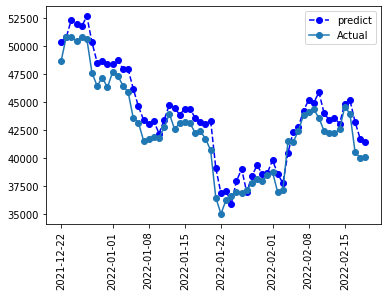

CPU times: user 2min 23s, sys: 7.35 s, total: 2min 30s
Wall time: 1min 15s


In [12]:
%%time
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

scaler = PowerTransformer()
data = Close.values
data = scaler.fit_transform(data)

y_scaler = PowerTransformer()
y_prime = Close.values[:,-1].reshape(-1, 1)
y_prime = y_scaler.fit_transform(y_prime)

# choose a number of time steps
n_steps = 5
# convert into input/output
X, y = split_sequences(data, n_steps)

X_train, X_test =X[:-60], X[-60:]
y_train, y_test =  y[:-60], y[-60:]
# the dataset knows the number of features, e.g. 2
n_features = X.shape[2]
# define model
model = Sequential()
model.add(LSTM(40, activation='sigmoid', input_shape=(n_steps, n_features)))
#model.add(Dropout(0.01))
#model.add(RepeatVector(2))
#model.add(LSTM(20, activation='relu'))#, return_sequences=True))
#model.add(TimeDistributed(Dense(n_features)))
model.add(Dense(1))#,  activation='sigmoid'))
model.compile(optimizer='RMSprop', loss='mse',metrics=[tf.keras.metrics.RootMeanSquaredError()])
# fit model
model.fit(X_train, y_train, epochs=500,batch_size=32, verbose=0)
# demonstrate prediction
model.summary()
test = []
for i in range(60):

    test.append(X_test[i])

yhat = model.predict(array(test), verbose=0)
prediction = []
for i in range(60):

    prediction.append(yhat[i][0])

mae = mean_absolute_error(y_test, prediction)
rmse = sqrt(mean_squared_error(y_test, prediction))
print('MAE before inverse Scaling: %f' % mae)
print('RMSE before inverse Scaling: %f' % rmse)

y_test = y_scaler.inverse_transform(y_test.reshape(-1, 1))
y_test = [ '%.1f' % y for y in y_test ]
y_test = [float(i) for i in y_test]
predict = y_scaler.inverse_transform(array(prediction).reshape(-1, 1))
predict = [ '%.3f' % y for y in predict ]
predict = [float(i) for i in predict]


x = pd.DataFrame(Close.index[-60:]).values

mae = mean_absolute_error(y_test, predict)
rmse = sqrt(mean_squared_error(y_test, predict))
print('MAE after inverse scaling: %f' % mae)
print('RMSE after inverse scaling: %f' % rmse)

plt.plot(x, predict,'--bo', label = "predict",linestyle = 'dashed')
plt.plot(x, y_test,marker='o', label = "Actual")
plt.xticks(rotation = 90)
plt.legend()
plt.show()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 40)                23200     
                                                                 
 dense_1 (Dense)             (None, 1)                 41        
                                                                 
 dropout (Dropout)           (None, 1)                 0         
                                                                 
Total params: 23,241
Trainable params: 23,241
Non-trainable params: 0
_________________________________________________________________
MAE before inverse Scaling: 0.020965
RMSE before inverse Scaling: 0.023543
MAE after inverse scaling: 1233.538833
RMSE after inverse scaling: 1371.284946


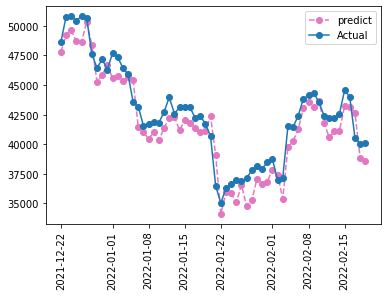

CPU times: user 15min 24s, sys: 33.2 s, total: 15min 57s
Wall time: 3min 19s


In [13]:
%%time
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

scaler = PowerTransformer()
data = Close.values
data = scaler.fit_transform(data)

X = data[:,:-1]
X = X.reshape((X.shape[0], X.shape[1],1))

y = data[:,-1]
y_scaler = PowerTransformer()
y_prime = Close.values[:,-1].reshape(-1, 1)
y_prime = y_scaler.fit_transform(y_prime)

# choose a number of time steps
n_steps = 4
# convert into input/output
#X, y = split_sequences(data, n_steps)

X_train, X_test =X[:-60], X[-60:]
y_train, y_test =  y[:-60], y[-60:]
# the dataset knows the number of features, e.g. 2
n_features = X.shape[1]
size = 50
FORECAST_RANGE = 4

model_cnn = Sequential()
model_cnn.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_features,1)))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model_cnn.add(Dense(1))

model_cnn.compile(optimizer='RMSprop', loss='mse',metrics=[tf.keras.metrics.RootMeanSquaredError()])
# fit model
model_cnn.fit(X_train, y_train, epochs=500,batch_size=32, verbose=0)

model.summary()
# demonstrate prediction
test = []
for i in range(60):

    test.append(X_test[i])

yhat = model_cnn.predict(array(test), verbose=0)
prediction = []
for i in range(60):

    prediction.append(yhat[i][0])

mae = mean_absolute_error(y_test, prediction)
rmse = sqrt(mean_squared_error(y_test, prediction))
print('MAE before inverse Scaling: %f' % mae)
print('RMSE before inverse Scaling: %f' % rmse)

y_test = y_scaler.inverse_transform(y_test.reshape(-1, 1))
y_test = [ '%.1f' % y for y in y_test ]
y_test = [float(i) for i in y_test]
predict = y_scaler.inverse_transform(array(prediction).reshape(-1, 1))
predict = [ '%.3f' % y for y in predict ]
predict = [float(i) for i in predict]


x = pd.DataFrame(Close.index[-60:]).values

mae = mean_absolute_error(y_test, predict)
rmse = sqrt(mean_squared_error(y_test, predict))
print('MAE after inverse scaling: %f' % mae)
print('RMSE after inverse scaling: %f' % rmse)

plt.plot(x, predict,'--bo', label = "predict",linestyle = 'dashed',color='C6')
plt.plot(x, y_test,marker='o', label = "Actual")
plt.xticks(rotation = 90)
plt.legend()
plt.show()

In [14]:
%%time
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

scaler = PowerTransformer()
data = Close.values
data = scaler.fit_transform(data)

X = data[:,:-1]
X = X.reshape((X.shape[0], X.shape[1],1))

subsequences = 11
timesteps = X.shape[1]//subsequences
X = X.reshape((X.shape[0], subsequences, timesteps, 1))

y = data[:,-1]
y_scaler = PowerTransformer()
y_prime = Close.values[:,-1].reshape(-1, 1)
y_prime = y_scaler.fit_transform(y_prime)

# choose a number of time steps
n_steps = 4
# convert into input/output
#X, y = split_sequences(data, n_steps)

X_train, X_test =X[:-60], X[-60:]
y_train, y_test =  y[:-60], y[-60:]
# the dataset knows the number of features, e.g. 2
n_features = X.shape[1]
size = 50
FORECAST_RANGE = 4
# define model(n_steps, n_features)


model_cnn_lstm = Sequential()
model_cnn_lstm.add(TimeDistributed(Conv1D(filters=32, kernel_size=2, activation='relu'), input_shape=(None, X.shape[2], X.shape[3])))
model_cnn_lstm.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model_cnn_lstm.add(TimeDistributed(Flatten()))
model_cnn_lstm.add(LSTM(40, activation='relu'))
model_cnn_lstm.add(Dense(1))

model_cnn_lstm.compile(optimizer='adam', loss='mse',metrics=[tf.keras.metrics.RootMeanSquaredError()])
# fit model
model_cnn_lstm.fit(X_train, y_train, epochs=500,batch_size=32, verbose=0)

model.summary()
# demonstrate prediction
test = []
for i in range(60):

    test.append(X_test[i])

yhat = model_cnn_lstm.predict(array(test), verbose=0)
prediction = []
for i in range(60):

    prediction.append(yhat[i][0])

mae = mean_absolute_error(y_test, prediction)
rmse = sqrt(mean_squared_error(y_test, prediction))
print('MAE before inverse Scaling: %f' % mae)
print('RMSE before inverse Scaling: %f' % rmse)

y_test = y_scaler.inverse_transform(y_test.reshape(-1, 1))
y_test = [ '%.1f' % y for y in y_test ]
y_test = [float(i) for i in y_test]
predict = y_scaler.inverse_transform(array(prediction).reshape(-1, 1))
predict = [ '%.3f' % y for y in predict ]
predict = [float(i) for i in predict]


x = pd.DataFrame(Close.index[-60:]).values

mae = mean_absolute_error(y_test, predict)
rmse = sqrt(mean_squared_error(y_test, predict))
print('MAE after inverse scaling: %f' % mae)
print('RMSE after inverse scaling: %f' % rmse)

plt.plot(x, predict,'--bo', label = "predict",linestyle = 'dashed')
plt.plot(x, y_test,marker='o', label = "Actual")
plt.xticks(rotation = 90)
plt.legend()
plt.show()

ValueError: cannot reshape array of size 271752 into shape (2613,11,9,1)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 5, 64)            35072     
 l)                                                              
                                                                 
 lstm_4 (LSTM)               (None, 32)                12416     
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 47,521
Trainable params: 47,521
Non-trainable params: 0
_________________________________________________________________
MAE before inverse Scaling: 0.016624
RMSE before inverse Scaling: 0.019817


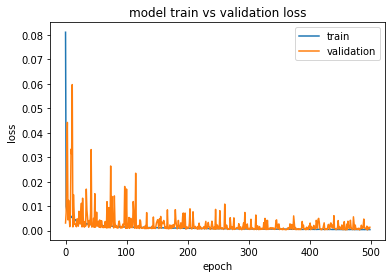

MAE after inverse scaling: 980.120433
RMSE after inverse scaling: 1154.029271


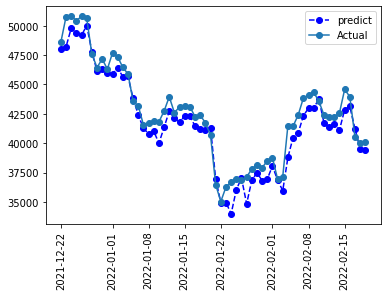

CPU times: user 7min 32s, sys: 27 s, total: 7min 59s
Wall time: 2min 47s


In [15]:
%%time
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

scaler = PowerTransformer()
data = Close.values
data = scaler.fit_transform(data)

y_scaler = PowerTransformer()
y_prime = Close.values[:,-1].reshape(-1, 1)
y_prime = y_scaler.fit_transform(y_prime)

# choose a number of time steps
n_steps = 5
# convert into input/output
X, y = split_sequences(data, n_steps)

#X_train, X_test =X[:-60], X[-60:]
#y_train, y_test =  y[:-60], y[-60:]

X_train, X_val, X_test = X[:-120,:] , X[-120:-60,:] , X[-60:,:]
y_train, y_val, y_test = y[:-120] ,y[-120:-60], y[-60:]
# the dataset knows the number of features, e.g. 2
n_features = X.shape[2]
# define model
model = Sequential()
"""model.add(LSTM(40, activation='relu', return_sequences=True,input_shape=(n_steps, n_features)))
#model.add(RepeatVector(2))
#model.add(LSTM(50, activation='relu', return_sequences=True))
#model.add(LSTM(20, activation='relu', return_sequences=True))
model.add(LSTM(10, activation='relu'))
#model.add(TimeDistributed(Dense(n_features)))
model.add(Dense(1))#,  activation='sigmoid'))"""
model.add(Bidirectional(LSTM(32, activation='sigmoid', return_sequences=True), input_shape=(n_steps, n_features)))
#model.add(Dropout(rate=0.1))
model.add(LSTM(32, activation='sigmoid'))#, return_sequences=True))
#model.add(Dropout(rate=0.01))
#model.add(LSTM(10, activation='sigmoid', return_sequences=True))
#model.add(Dropout(rate=0.01))
model.add(Dense(1))
#model.add(TimeDistributed(Dense(1))) #, activation= 'sigmoid' )))
#opt = tf.keras.optimizers.Adam(learning_rate = 0.001)
model.compile(optimizer='RMSprop', loss='mse',metrics=[tf.keras.metrics.RootMeanSquaredError()])

#es = EarlyStopping(monitor= 'val_loss' , min_delta=50)
# fit model
history = model.fit(X_train, y_train,validation_data=(X_val, y_val),
 epochs=500,batch_size=32, verbose=0)#,callbacks=[es])

model.summary()
# demonstrate prediction
test = []
for i in range(60):

    test.append(X_test[i])

yhat = model.predict(array(test), verbose=0)
prediction = []
for i in range(60):

    prediction.append(yhat[i][0])

mae = mean_absolute_error(y_test, prediction)
rmse = sqrt(mean_squared_error(y_test, prediction))
print('MAE before inverse Scaling: %f' % mae)
print('RMSE before inverse Scaling: %f' % rmse)

y_test = y_scaler.inverse_transform(y_test.reshape(-1, 1))
y_test = [ '%.1f' % y for y in y_test ]
y_test = [float(i) for i in y_test]
predict = y_scaler.inverse_transform(array(prediction).reshape(-1, 1))
predict = [ '%.3f' % y for y in predict ]
predict = [float(i) for i in predict]


plt.plot(history.history[ 'loss' ])
plt.plot(history.history[ 'val_loss' ])
plt.title( 'model train vs validation loss' )
plt.ylabel( 'loss' )
plt.xlabel( 'epoch' )
plt.legend([ 'train' , 'validation' ], loc= 'upper right' )
plt.show()

x = pd.DataFrame(Close.index[-60:]).values

mae = mean_absolute_error(y_test, predict)
rmse = sqrt(mean_squared_error(y_test, predict))
print('MAE after inverse scaling: %f' % mae)
print('RMSE after inverse scaling: %f' % rmse)

plt.plot(x, predict,'--bo', label = "predict",linestyle = 'dashed')
plt.plot(x, y_test,marker='o', label = "Actual")
plt.xticks(rotation = 90)
plt.legend()
plt.show()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 4, 128)            89856     
                                                                 
 gru_1 (GRU)                 (None, 4, 32)             15552     
                                                                 
 gru_2 (GRU)                 (None, 4, 32)             6336      
                                                                 
 gru_3 (GRU)                 (None, 32)                6336      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 118,113
Trainable params: 118,113
Non-trainable params: 0
_________________________________________________________________
MAE before inverse Scaling: 0.015007
RMSE before

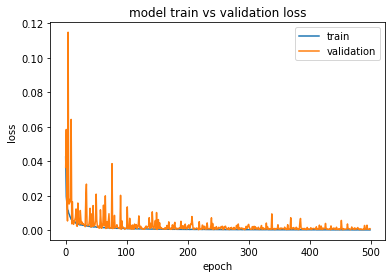

MAE after inverse scaling: 901.982800
RMSE after inverse scaling: 1053.434627


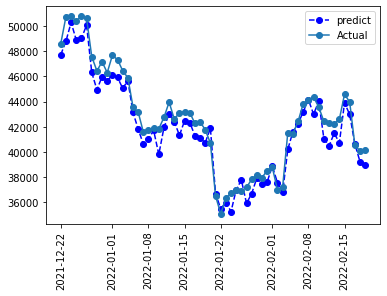

CPU times: user 11min 50s, sys: 46.6 s, total: 12min 37s
Wall time: 5min 14s


In [16]:
%%time
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

scaler = PowerTransformer()
data = Close.values
data = scaler.fit_transform(data)

y_scaler = PowerTransformer()
y_prime = Close.values[:,-1].reshape(-1, 1)
y_prime = y_scaler.fit_transform(y_prime)

# choose a number of time steps
n_steps = 4
# convert into input/output
X, y = split_sequences(data, n_steps)

#X_train, X_test =X[:-60], X[-60:]
#y_train, y_test =  y[:-60], y[-60:]

X_train, X_val, X_test = X[:-120,:] , X[-120:-60,:] , X[-60:,:]
y_train, y_val, y_test = y[:-120] ,y[-120:-60], y[-60:]
# the dataset knows the number of features, e.g. 2
n_features = X.shape[2]
# define model

model=Sequential()
model.add(GRU(128,return_sequences=True,input_shape=(n_steps,n_features)))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))

"""model=Sequential()
model.add(GRU(32, activation='sigmoid',return_sequences=True,input_shape=(n_steps,n_features)))
model.add(GRU(32, activation='sigmoid',return_sequences=True))
model.add(GRU(32, activation='sigmoid'))
model.add(Dropout(0.20))
model.add(Dense(1))"""
#model.add(TimeDistributed(Dense(1))) #, activation= 'sigmoid' )))
#opt = tf.keras.optimizers.Adam(learning_rate = 0.001)
model.compile(optimizer='RMSprop', loss='mse',metrics=[tf.keras.metrics.RootMeanSquaredError()])

#es = EarlyStopping(monitor= 'val_loss' , min_delta=50)
# fit model
history = model.fit(X_train, y_train,validation_data=(X_val, y_val),
 epochs=500,batch_size=32, verbose=0)#,callbacks=[es])

model.summary()
# demonstrate prediction
test = []
for i in range(60):

    test.append(X_test[i])

yhat = model.predict(array(test), verbose=0)
prediction = []
for i in range(60):

    prediction.append(yhat[i][0])

mae = mean_absolute_error(y_test, prediction)
rmse = sqrt(mean_squared_error(y_test, prediction))
print('MAE before inverse Scaling: %f' % mae)
print('RMSE before inverse Scaling: %f' % rmse)

y_test = y_scaler.inverse_transform(y_test.reshape(-1, 1))
y_test = [ '%.1f' % y for y in y_test ]
y_test = [float(i) for i in y_test]
predict = y_scaler.inverse_transform(array(prediction).reshape(-1, 1))
predict = [ '%.3f' % y for y in predict ]
predict = [float(i) for i in predict]


plt.plot(history.history[ 'loss' ])
plt.plot(history.history[ 'val_loss' ])
plt.title( 'model train vs validation loss' )
plt.ylabel( 'loss' )
plt.xlabel( 'epoch' )
plt.legend([ 'train' , 'validation' ], loc= 'upper right' )
plt.show()

x = pd.DataFrame(Close.index[-60:]).values

mae = mean_absolute_error(y_test, predict)
rmse = sqrt(mean_squared_error(y_test, predict))
print('MAE after inverse scaling: %f' % mae)
print('RMSE after inverse scaling: %f' % rmse)

plt.plot(x, predict,'--bo', label = "predict",linestyle = 'dashed')
plt.plot(x, y_test,marker='o', label = "Actual")
plt.xticks(rotation = 90)
plt.legend()
plt.show()